<a href="https://colab.research.google.com/github/zainabbas313/OASIS-INFOBYTE-INTERNSHIP-TASKS/blob/main/CAR_PREDICTION_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OASIS INFOBYTE INTERNSHIP - TASK_03

# ABOUT DATASET

The dataset titled "Car price prediction(used cars)" available on Kaggle is designed for predicting the price of used cars based on various attributes. Here's an overview of its structure and contents:

### Dataset Overview:
- **File Name**: `car data.csv`
- **File Size**: 16.91 kB
- **Number of Columns**: 9

### Columns:
1. **Car_Name**: Name of the car (categorical)
2. **Year**: Year of the car's manufacturing (numerical)
3. **Selling_Price**: Selling price of the car (target variable, numerical)
4. **Present_Price**: Current market price of the car (numerical)
5. **Driven_kms**: Kilometers driven by the car (numerical)
6. **Fuel_Type**: Type of fuel used by the car (categorical)
7. **Selling_type**: Selling type (categorical)
8. **Transmission**: Type of transmission (categorical)
9. **Owner**: Number of previous owners (numerical)

### Tags and Usability:
- **Tags**: Tabular, Automobiles and Vehicles, Beginner, India, Regression
- **Usability Rating**: 10.00 (indicating high usability for machine learning tasks)
- **License**: CC0: Public Domain
- **Expected Update Frequency**: Never (static dataset)

### Dataset Description:
This dataset is ideal for regression tasks where the goal is to predict the selling price of a used car based on its characteristics such as age (Year), current market price (Present_Price), kilometers driven (Driven_kms), fuel type (Fuel_Type), transmission type (Transmission), and more. It's suitable for learning regression modeling techniques, exploring feature engineering, and evaluating various machine learning algorithms.

### Usage Examples:
- **Learning**: Useful for understanding how to train a car price prediction model.
- **Research**: Supports research in the domain of automotive pricing models.
- **Application**: Applicable for developing real-world applications related to used car valuation.

### Data Quality:
- **Cleanliness**: Well-documented and maintained.
- **Originality**: Original dataset source on Kaggle with high-quality notebooks available for reference.

### Additional Notes:
- The dataset has been actively viewed and downloaded, indicating its popularity and usefulness among data enthusiasts and learners.

This dataset provides a rich opportunity for exploration and experimentation in machine learning, particularly in the field of regression analysis applied to automotive data.

# LIBRARIES

In [1]:
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
import pandas as pd
import numpy as np
import warnings


In [2]:
drive.mount('/content/drive')
warnings.filterwarnings('ignore')

Mounted at /content/drive


# LOAD DATASET

In [3]:
df = pd.read_csv('/content/drive/MyDrive/SUMMER_2024/GROW-INTERN INTERNSHIP/Car price prediction(used cars)/car data.csv')

In [4]:
df.shape

(301, 9)

In [5]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# DATA CLEANING

In [6]:
df.columns = df.columns.str.lower()

In [7]:
df.isnull().sum().any()

False

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   car_name       301 non-null    object 
 1   year           301 non-null    int64  
 2   selling_price  301 non-null    float64
 3   present_price  301 non-null    float64
 4   driven_kms     301 non-null    int64  
 5   fuel_type      301 non-null    object 
 6   selling_type   301 non-null    object 
 7   transmission   301 non-null    object 
 8   owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
obj_col = df.select_dtypes(['object']).columns
num_col = df.select_dtypes(['int', 'float']).columns

In [10]:
for col in list(obj_col):
  print(f'{col} = > {len(df[col].unique())}')
  print()

car_name = > 98

fuel_type = > 3

selling_type = > 2

transmission = > 2



In [11]:
le = LabelEncoder()
df['fuel_type'] = le.fit_transform(df['fuel_type'])
df['selling_type'] = le.fit_transform(df['selling_type'])
df['transmission'] = le.fit_transform(df['transmission'])

In [12]:
df.drop('car_name', axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           301 non-null    int64  
 1   selling_price  301 non-null    float64
 2   present_price  301 non-null    float64
 3   driven_kms     301 non-null    int64  
 4   fuel_type      301 non-null    int64  
 5   selling_type   301 non-null    int64  
 6   transmission   301 non-null    int64  
 7   owner          301 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 18.9 KB


In [13]:
df.describe()

,year,selling_price,present_price,driven_kms,fuel_type,selling_type,transmission,owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,1.787375,0.352159,0.867110,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.425801,0.478439,0.340021,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,2.000000,0.000000,1.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,2.000000,0.000000,1.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,2.000000,1.000000,1.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,2.000000,1.000000,1.000000,3.000000


# DATA PRE-PROCESSING

## EDA & TRANSFORMATION

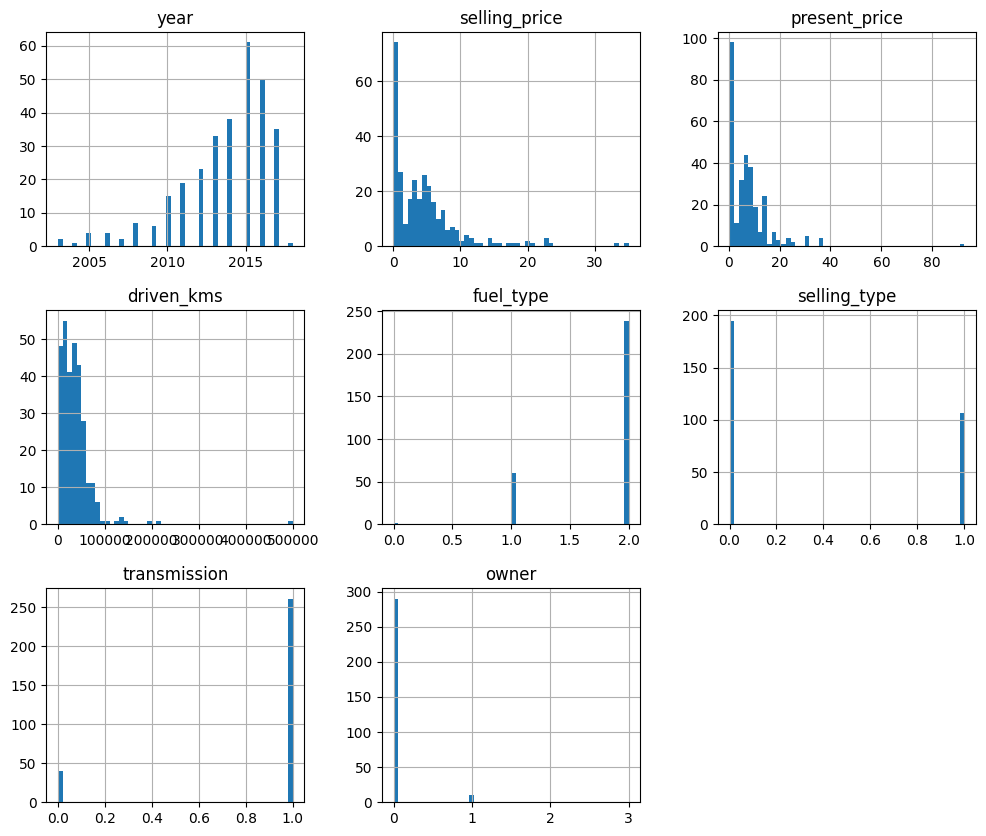

In [14]:
df.hist(figsize = (12,10), bins = 50)
plt.show()

In [15]:
df['driven_kms'] = np.log(df['driven_kms'])
df['selling_price'] = np.log(df['selling_price'])
df['present_price'] = np.log(df['present_price'])

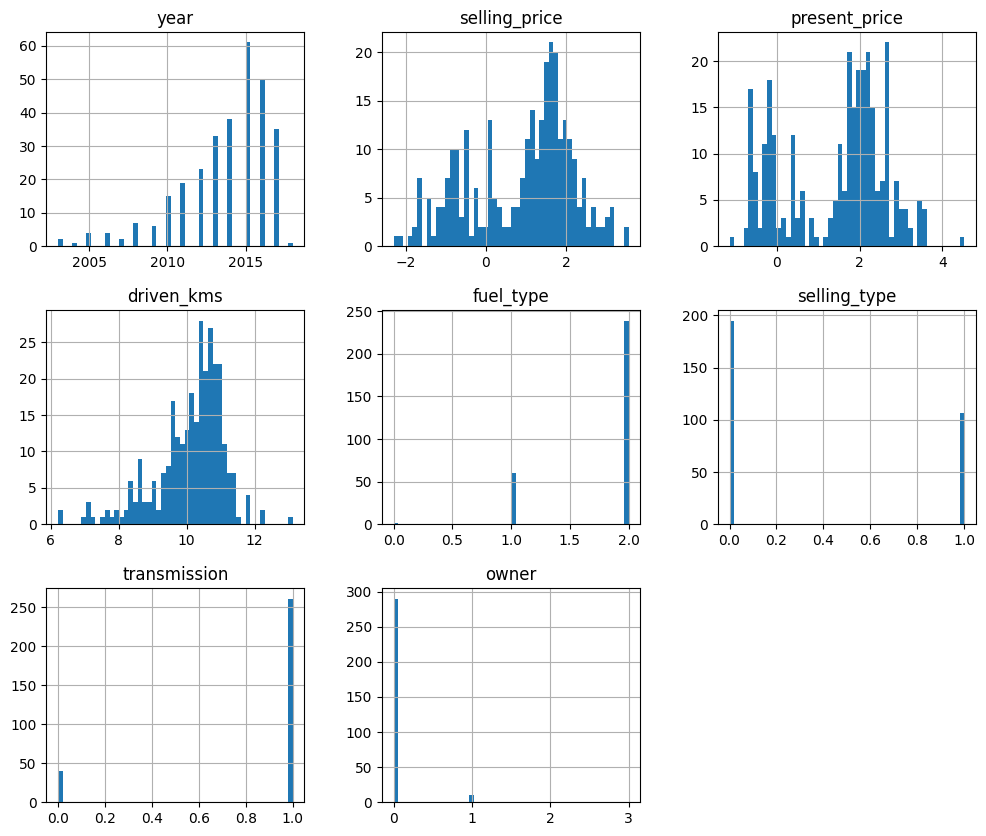

In [16]:
df.hist(figsize = (12,10), bins = 50)
plt.show()

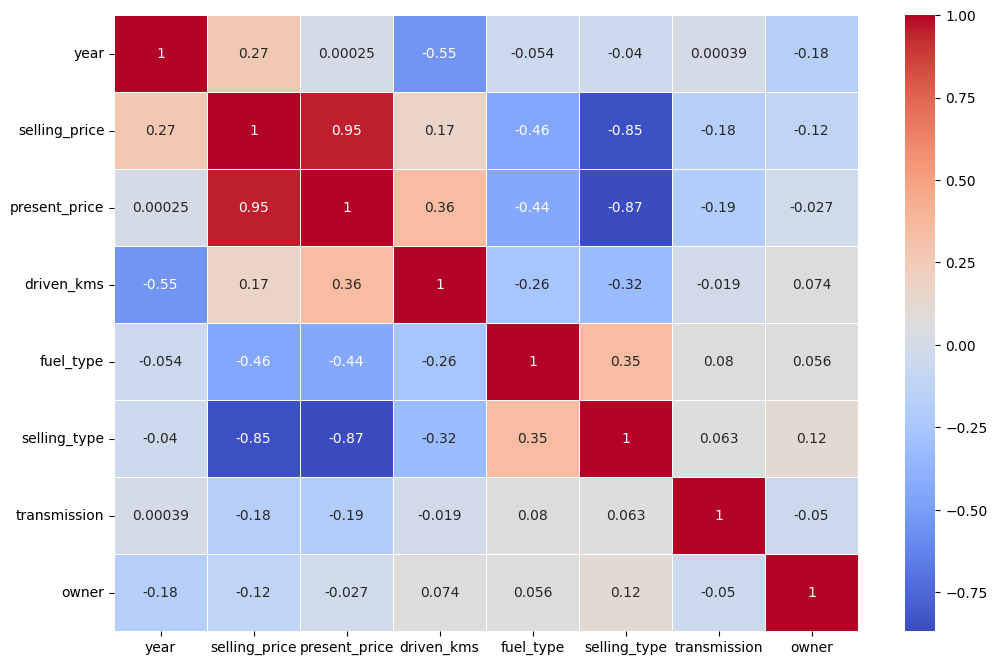

In [17]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

## FEATURES SELECTION

In [19]:
x = df.drop('selling_price', axis = 1)
y = df.selling_price

x, y = shuffle(x, y, random_state=42)

In [20]:
model_sfs = RandomForestRegressor(random_state = 42)

In [21]:
sfs = SFS(model_sfs, k_features = 'best', forward = True, floating = True, scoring = 'neg_root_mean_squared_error', cv = 5, n_jobs = 1, verbose = 2)

In [22]:
sfs.fit(x,y)


[2024-07-18 20:41:10] Features: 1/7 -- score: -0.4029621579500101
[2024-07-18 20:41:22] Features: 2/7 -- score: -0.23111945225339398
[2024-07-18 20:41:29] Features: 3/7 -- score: -0.22242935279814943
[2024-07-18 20:41:37] Features: 4/7 -- score: -0.2176950487105211
[2024-07-18 20:41:43] Features: 5/7 -- score: -0.21592895002395252
[2024-07-18 20:41:50] Features: 6/7 -- score: -0.21455892956400277
[2024-07-18 20:41:56] Features: 7/7 -- score: -0.2155843124258237

SequentialFeatureSelector(estimator=RandomForestRegressor(random_state=42),
                          floating=True, k_features=(1, 7),
                          scoring='neg_root_mean_squared_error', verbose=2)

In [23]:
list(sfs.k_feature_names_)

['year', 'present_price', 'driven_kms', 'fuel_type', 'selling_type', 'owner']

In [24]:
x = df[list(sfs.k_feature_names_)]
y = df.selling_price

In [25]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.2,random_state = 42, shuffle = True)

# MODELLING

In [26]:
model_l = LinearRegression()
model_r = RandomForestRegressor()

In [27]:
model_l.fit(xtrain,ytrain)

LinearRegression()

In [28]:
model_r.fit(xtest,ytest)

RandomForestRegressor()

# EVALUATION

In [30]:
pred_l = model_l.predict(xtest)


mse = mean_squared_error(ytest, pred_l)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest, pred_l)
r2 = r2_score(ytest, pred_l)

# Print metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

baseline_pred = [np.mean(ytest)] * len(ytest)
baseline_mse = mean_squared_error(ytest, baseline_pred)
baseline_rmse = np.sqrt(baseline_mse)
print(f'Baseline MSE: {baseline_mse}')
print(f'Baseline RMSE: {baseline_rmse}')


Mean Squared Error (MSE): 0.03909336133565857
Root Mean Squared Error (RMSE): 0.1977204120359316
Mean Absolute Error (MAE): 0.14201729347298442
R-squared (R2): 0.9726806309248422
Baseline MSE: 1.430975994654549
Baseline RMSE: 1.196234088569018


In [31]:
pred_r = model_r.predict(xtest)

mse = mean_squared_error(ytest, pred_r)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest, pred_r)
r2 = r2_score(ytest, pred_r)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

baseline_pred = [np.mean(ytest)] * len(ytest)
baseline_mse = mean_squared_error(ytest, baseline_pred)
baseline_rmse = np.sqrt(baseline_mse)
print(f'Baseline MSE: {baseline_mse}')
print(f'Baseline RMSE: {baseline_rmse}')


Mean Squared Error (MSE): 0.008981587101201446
Root Mean Squared Error (RMSE): 0.09477123562137114
Mean Absolute Error (MAE): 0.06811694120216057
R-squared (R2): 0.993723453688425
Baseline MSE: 1.430975994654549
Baseline RMSE: 1.196234088569018


# CROSS VALIDATION

In [33]:
model = RandomForestRegressor(random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'mse': make_scorer(mean_squared_error),
    'mae': make_scorer(mean_absolute_error),
    'r2': make_scorer(r2_score)
}

scores_mse = cross_val_score(model, xtrain, ytrain, cv=kf, scoring='neg_mean_squared_error')
scores_mae = cross_val_score(model, xtrain, ytrain, cv=kf, scoring='neg_mean_absolute_error')
scores_r2 = cross_val_score(model, xtrain, ytrain, cv=kf, scoring='r2')

rmse_scores = np.sqrt(-scores_mse)

print(f'Mean MSE: {-scores_mse.mean()}')
print(f'Standard Deviation of MSE: {scores_mse.std()}')
print(f'Mean RMSE: {rmse_scores.mean()}')
print(f'Standard Deviation of RMSE: {rmse_scores.std()}')
print(f'Mean MAE: {-scores_mae.mean()}')
print(f'Standard Deviation of MAE: {scores_mae.std()}')
print(f'Mean R-squared: {scores_r2.mean()}')
print(f'Standard Deviation of R-squared: {scores_r2.std()}')

model.fit(xtrain, ytrain)
pred = model.predict(xtest)

mse_test = mean_squared_error(ytest, pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(ytest, pred)
r2_test = r2_score(ytest, pred)

print('\n\n')
print(f'Test Set MSE: {mse_test}')
print(f'Test Set RMSE: {rmse_test}')
print(f'Test Set MAE: {mae_test}')
print(f'Test Set R-squared: {r2_test}')


Mean MSE: 0.053711260749680224
Standard Deviation of MSE: 0.01630822500800383
Mean RMSE: 0.22899822087392266
Standard Deviation of RMSE: 0.03565214700769594
Mean MAE: 0.16019649052479307
Standard Deviation of MAE: 0.024179893214209193
Mean R-squared: 0.9677169786772943
Standard Deviation of R-squared: 0.007370832868339138



Test Set MSE: 0.038334776105412846
Test Set RMSE: 0.19579268654730914
Test Set MAE: 0.14797014710421807
Test Set R-squared: 0.9732107482944413


# CONCLUSION

### Cross-Validation Metrics (Training Data):
- **Mean MSE**: 0.0537
- **Mean RMSE**: 0.2290
- **Mean MAE**: 0.1602
- **Mean R-squared**: 0.9677

These metrics indicate that the model fits the training data very well:
- **Mean MSE** (0.0537) suggests that, on average, the squared differences between predicted and actual values are low, indicating accurate predictions.
- **Mean RMSE** (0.2290) is relatively low, showing that predictions are close to the actual values in terms of the target variable's scale.
- **Mean MAE** (0.1602) indicates that the average absolute difference between predicted and actual values is small.
- **Mean R-squared** (0.9677) means the model explains approximately 96.77% of the variance in the target variable, demonstrating a strong fit to the data.

### Test Set Metrics:
- **Test Set MSE**: 0.0383
- **Test Set RMSE**: 0.1958
- **Test Set MAE**: 0.1480
- **Test Set R-squared**: 0.9732

The metrics on the test set confirm the model’s excellent performance:
- **Test Set MSE** (0.0383) is lower than the training set MSE, suggesting good generalization to unseen data.
- **Test Set RMSE** (0.1958) is low, indicating that predictions on the test set are also close to the actual values.
- **Test Set MAE** (0.1480) shows that the average absolute difference between predicted and actual values is small in the test set.
- **Test Set R-squared** (0.9732) implies that the model explains approximately 97.32% of the variance in the test set, reinforcing its strong predictive capability.

### Summary:
The model demonstrates exceptional performance across both cross-validation on the training data and evaluation on the test set. It achieves low error metrics (MSE, RMSE, MAE) and high R-squared values consistently, indicating precise predictions and a robust fit to the data. The low variance in performance metrics between training and test sets suggests that the model generalizes well to new data, making it a reliable and effective tool for predicting the target variable.

